In [1]:
import pandas as pd
import gradio as gr
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load dataset
df = pd.read_csv("ad_click_dataset.csv")

In [3]:
# Data Exploration
print(df.head())
print(df.info())
print(df.isnull().sum())

     id full_name   age      gender device_type ad_position browsing_history  \
0   670   User670  22.0  Non-Binary     Desktop         Top         Shopping   
1  3044  User3044  38.0        Male     Desktop         Top    Entertainment   
2  5912  User5912  41.0  Non-Binary     Desktop        Side        Education   
3  5418  User5418  34.0        Male     Desktop      Bottom    Entertainment   
4  9452  User9452  39.0  Non-Binary     Desktop      Bottom     Social Media   

  time_of_day  click  
0   Afternoon      1  
1     Morning      1  
2       Night      1  
3     Evening      1  
4     Morning      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               10000 non-null  float64
 3   gender            10000 non-null  

/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_22576/579853715.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ctr_age = df.groupby('age_group')['click'].mean().sort_values(ascending=False)
/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_22576/579853715.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr_age.index, y=ctr_age.values, palette="viridis")


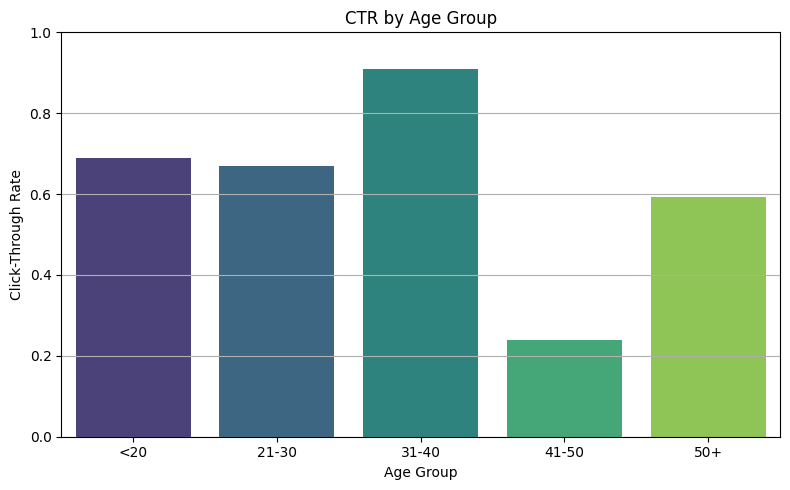

In [4]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 30, 40, 50, 100], labels=["<20", "21-30", "31-40", "41-50", "50+"])
ctr_age = df.groupby('age_group')['click'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=ctr_age.index, y=ctr_age.values, palette="viridis")
plt.title('CTR by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Click-Through Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_22576/100060313.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr_gender.index, y=ctr_gender.values, palette="viridis")


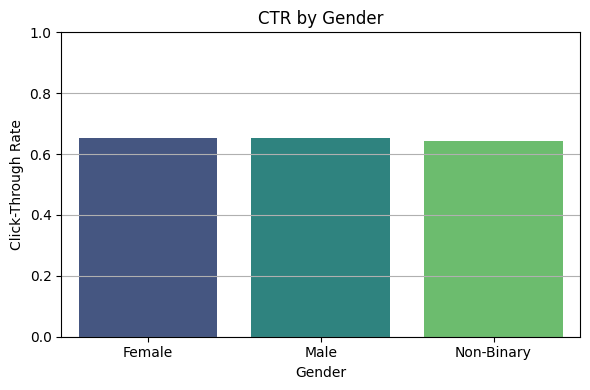

In [5]:
ctr_gender = df.groupby('gender')['click'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=ctr_gender.index, y=ctr_gender.values, palette="viridis")
plt.title('CTR by Gender')
plt.xlabel('Gender')
plt.ylabel('Click-Through Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_22576/2785926413.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=ctr_position.index, y=ctr_position.values, palette="viridis")


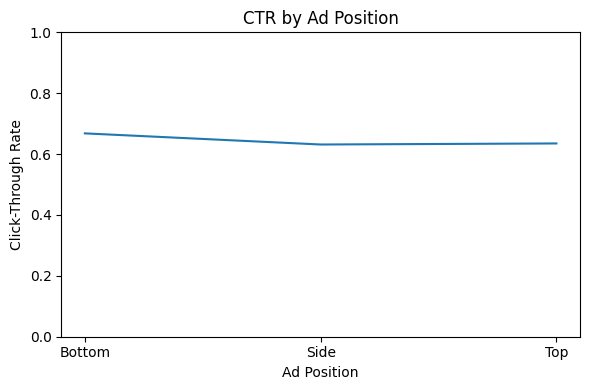

In [6]:
ctr_position = df.groupby('ad_position')['click'].mean()

plt.figure(figsize=(6, 4))
sns.lineplot(x=ctr_position.index, y=ctr_position.values, palette="viridis")
plt.title('CTR by Ad Position')
plt.xlabel('Ad Position')
plt.ylabel('Click-Through Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_22576/3725174149.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr_device.index, y=ctr_device.values, palette="viridis")


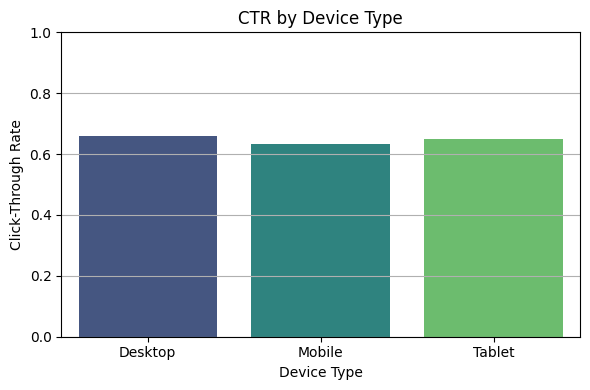

In [7]:
ctr_device = df.groupby('device_type')['click'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=ctr_device.index, y=ctr_device.values, palette="viridis")
plt.title('CTR by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Click-Through Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_22576/4005267069.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=ctr_browsing.index, y=ctr_browsing.values, palette="viridis")


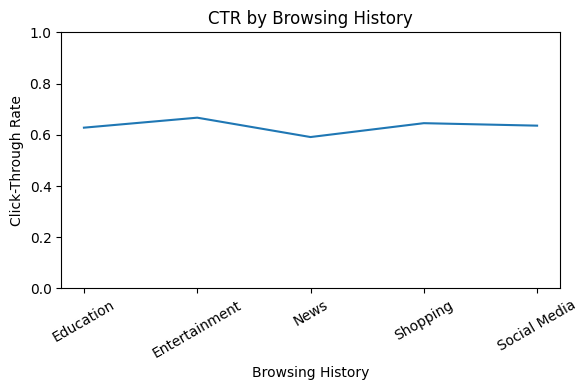

In [8]:
ctr_browsing = df.groupby('browsing_history')['click'].mean()

plt.figure(figsize=(6,4))
sns.lineplot(x=ctr_browsing.index, y=ctr_browsing.values, palette="viridis")
plt.title('CTR by Browsing History')
plt.xlabel('Browsing History')
plt.ylabel('Click-Through Rate')
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

/var/folders/m3/kj05rjj15kq9tnf9gj6h5f_00000gn/T/ipykernel_22576/3722351555.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ctr_time.index, y=ctr_time.values, palette="viridis")


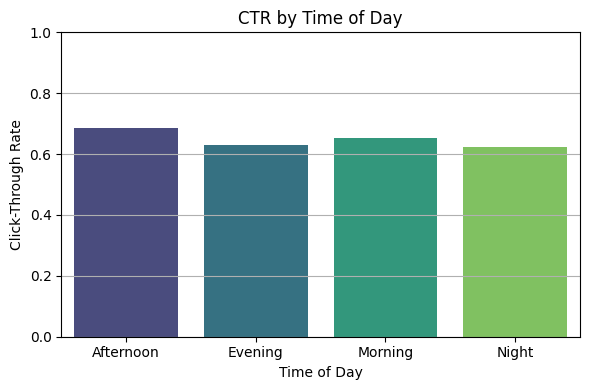

In [9]:
ctr_time = df.groupby('time_of_day')['click'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=ctr_time.index, y=ctr_time.values, palette="viridis")
plt.title('CTR by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Click-Through Rate')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [10]:
# Preprocessing
numeric_features = ['age']
categorical_features = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ])


X = df[['age', 'gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']]
Y = df['click']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
clf_pipeline.fit(X_train, Y_train)


logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
logreg_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender', 'device_type',
                                                   'ad_position',
                                                   'browsing_history',
                                                   'time_of_day'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.82      0.71      0.76       705
           1       0.85      0.92      0.88      1295

    accuracy                           0.84      2000
   macro avg       0.84      0.81      0.82      2000
weighted avg       0.84      0.84      0.84      2000


--- Accuracy Score ---
0.843

--- Confusion Matrix ---


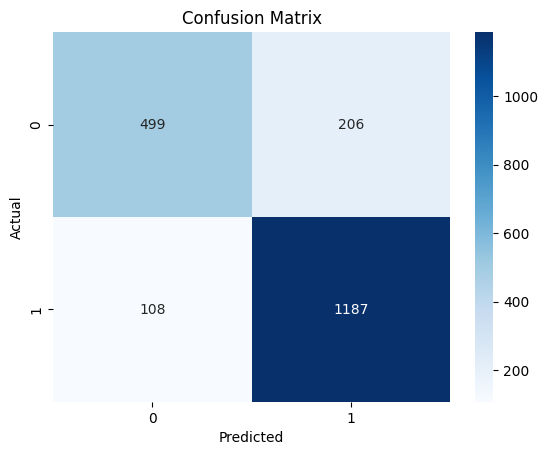


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.45      0.09      0.15       705
           1       0.66      0.94      0.77      1295

    accuracy                           0.64      2000
   macro avg       0.55      0.52      0.46      2000
weighted avg       0.58      0.64      0.55      2000

Accuracy: 0.641


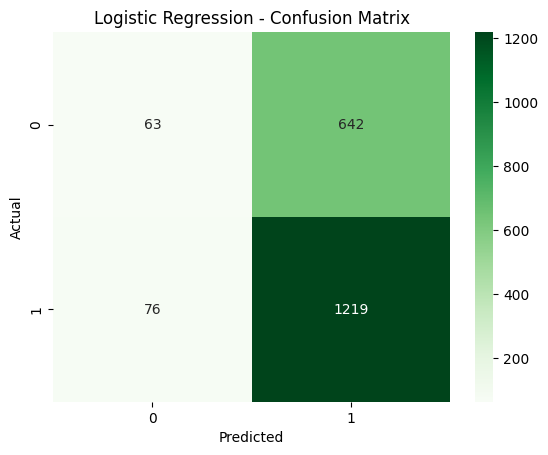

In [11]:
# Evaluate model
Y_pred = clf_pipeline.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(Y_test, Y_pred))
print("\n--- Accuracy Score ---")
print(accuracy_score(Y_test, Y_pred))

print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Y_pred_log = logreg_pipeline.predict(X_test)
print("\n--- Logistic Regression ---")
print(classification_report(Y_test, Y_pred_log))
print("Accuracy:", accuracy_score(Y_test, Y_pred_log))

sns.heatmap(confusion_matrix(Y_test, Y_pred_log), annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
# Sample test cases (single and multiple inputs)
single_user = pd.DataFrame({
    'age': [30],
    'gender': ['Male'],
    'device_type': ['Mobile'],
    'ad_position': ['Top'],
    'browsing_history': ['Shopping'],
    'time_of_day': ['Evening']
})

multiple_users = pd.DataFrame({
    'age': [25, 40, 25, 28],
    'gender': ['Female', 'Male', 'Female', 'Female'],
    'device_type': ['Mobile', 'Desktop', 'Mobile', 'Mobile'],
    'ad_position': ['Side', 'Top', 'Side', 'Top'],
    'browsing_history': ['Entertainment', 'Shopping', 'Entertainment', 'Social Media'],
    'time_of_day': ['Morning', 'Afternoon', 'Morning', 'Evening']
})

In [13]:
# Function to predict for single or multiple inputs
def predict_ad_clicks(users_df, pipeline):
    probabilities = pipeline.predict_proba(users_df)[:, 1]  # Probability of click (class 1)
    predictions = pipeline.predict(users_df)
    
    if len(users_df) == 1:
        result = "Clicked" if predictions[0] == 1 else "Not Clicked"
        print("\n--- Single User Prediction ---")
        print(f"Prediction: {result}")
        print(f"Click Probability: {probabilities[0]:.2%}")
        return
    
    print("\n--- Multiple Users Prediction ---")
    results = []
    for i, (prob, pred) in enumerate(zip(probabilities, predictions)):
        result = "Clicked" if pred == 1 else "Not Clicked"
        print(f"User {i+1}: {result}, Click Probability: {prob:.2%}")
        results.append((i+1, prob, result))
    
    max_prob_user = max(results, key=lambda x: x[1])
    print(f"\nMost Likely to Click: User {max_prob_user[0]} ({max_prob_user[2]}, Probability: {max_prob_user[1]:.2%})")

# Test predictions
predict_ad_clicks(single_user, clf_pipeline)
predict_ad_clicks(multiple_users, clf_pipeline)


--- Single User Prediction ---
Prediction: Not Clicked
Click Probability: 25.00%

--- Multiple Users Prediction ---
User 1: Not Clicked, Click Probability: 15.50%
User 2: Not Clicked, Click Probability: 36.00%
User 3: Not Clicked, Click Probability: 15.50%
User 4: Clicked, Click Probability: 55.00%

Most Likely to Click: User 4 (Clicked, Probability: 55.00%)


In [14]:
# Store previous results
previous_results = []

def predict_ad_click(age, gender, device_type, ad_position, browsing_history, time_of_day, input_id):
    user_df = pd.DataFrame({
        'age': [age],
        'gender': [gender],
        'device_type': [device_type],
        'ad_position': [ad_position],
        'browsing_history': [browsing_history],
        'time_of_day': [time_of_day]
    })

    prob = clf_pipeline.predict_proba(user_df)[:, 1][0]
    prediction = clf_pipeline.predict(user_df)[0]
    result = "Clicked" if prediction == 1 else "Not Clicked"

    inputs_dict = {
        "Age": age,
        "Gender": gender,
        "Device": device_type,
        "Ad Position": ad_position,
        "Browsing History": browsing_history,
        "Time of Day": time_of_day
    }

    previous_results.append((input_id, result, prob, inputs_dict))

    # Best prediction
    best = max(previous_results, key=lambda x: x[2])
    best_input_id, best_result, best_prob, best_inputs = best
    best_input_str = "\n".join([f"{k}: {v}" for k, v in best_inputs.items()])
    best_summary = f"Best so far: Input {best_input_id} - {best_result} ({best_prob:.2%})\n{best_input_str}"

    # All inputs so far
    history = ""
    for i, (pid, res, p, inputs) in enumerate(previous_results):
        input_text = ", ".join([f"{k}: {v}" for k, v in inputs.items()])
        history += f"{i+1}. {res} ({p:.2%}) - [{input_text}]\n"

    # Show "Enter New Input" button and update counter
    show_new_input = gr.update(visible=True)
    disable_submit = gr.update(visible=False) if len(previous_results) >= 6 else gr.update(visible=True)

    return (f"Prediction: {result} | Probability: {prob:.2%}",
            best_summary,
            history,
            input_id + 1,
            show_new_input,
            disable_submit)

def reset_only_inputs(counter):
    if counter > 6:
        return (
            gr.update(visible=False),  # hide submit
            gr.update(visible=False),  # hide new input
        )
    return (
        gr.update(visible=True),     # re-enable submit
        gr.update(visible=False),    # hide new input again
        gr.update(value=None),         # reset inputs only
        gr.update(value=None),
        gr.update(value=None),
        gr.update(value=None),
        gr.update(value=None),
        gr.update(value=None)
    )

In [15]:
# Gradio Interface
def create_interface():
    with gr.Blocks() as demo:
        gr.Markdown("## Ad Click Prediction Engine")

        counter_state = gr.State(1)

        with gr.Row():
            age = gr.Number(label="Age", minimum=18, maximum=99, value=30)
            gender = gr.Dropdown(["Male", "Female", "Non-Binary"], label="Gender")
            device = gr.Dropdown(["Mobile", "Desktop", "Tablet"], label="Device Type")
        with gr.Row():
            position = gr.Dropdown(["Top", "Side", "Bottom"], label="Ad Position")
            history = gr.Dropdown(["Shopping", "Entertainment", "Social Media", "News", "Education"], label="Browsing History")
            time = gr.Dropdown(["Morning", "Afternoon", "Evening", "Night"], label="Time of Day")

        submit = gr.Button("Predict Click")
        new_input_btn = gr.Button("Enter New Input", visible=False)

        prediction_output = gr.Textbox(label="Prediction Result", lines=2)
        best_output = gr.Textbox(label="Best Prediction So Far", lines=6)
        all_inputs_output = gr.Textbox(label="All Inputs & Predictions", lines=10)

        submit.click(
            predict_ad_click,
            inputs=[age, gender, device, position, history, time, counter_state],
            outputs=[
                prediction_output,
                best_output,
                all_inputs_output,
                counter_state,
                new_input_btn,
                submit
            ]
        )

        new_input_btn.click(
            reset_only_inputs,
            inputs=[counter_state],
            outputs=[
                submit,
                new_input_btn,
                age, gender, device, position, history, time
            ]
        )

    return demo

# Launch
demo = create_interface()
demo.launch()

* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
